In [1]:
from PIL import Image
import pytesseract
from pytesseract import Output
import cv2
from pdf2image import convert_from_path,convert_from_bytes
import numpy as np

POPPLER_PATH = r'C:\\Users\\yashs\\Workspace\\Softwares\\poppler-0.68.0_x86\\poppler-0.68.0\\bin'
pytesseract.pytesseract.tesseract_cmd = r'C:\\Users\\yashs\\Workspace\\Softwares\\Tesseract-OCR\\tesseract'
# Example tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract'

In [2]:
def get_image_from_pdf(path):
    dpi = 300
    img = convert_from_path(path, dpi=dpi, first_page=1, last_page=1, poppler_path=POPPLER_PATH)[0]
#     img = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2)
#     return img
    return np.array(img)

In [3]:
pdf_path = './private_data/EK_000001.pdf'

In [4]:
img_original = get_image_from_pdf(pdf_path)

In [5]:
def custom_thresholding(img):
    red_mask = np.where(img[:, :, 0] > 200, 1, 0)
    blue_mask = np.where(img[:, :, 1] > 200, 1, 0)
    green_mask = np.where(img[:, :, 2] > 200, 1, 0)
    bin_img = np.logical_or.reduce((red_mask, blue_mask, green_mask)).astype(np.uint8)*255
    
    return bin_img


In [6]:
img = custom_thresholding(img_original)

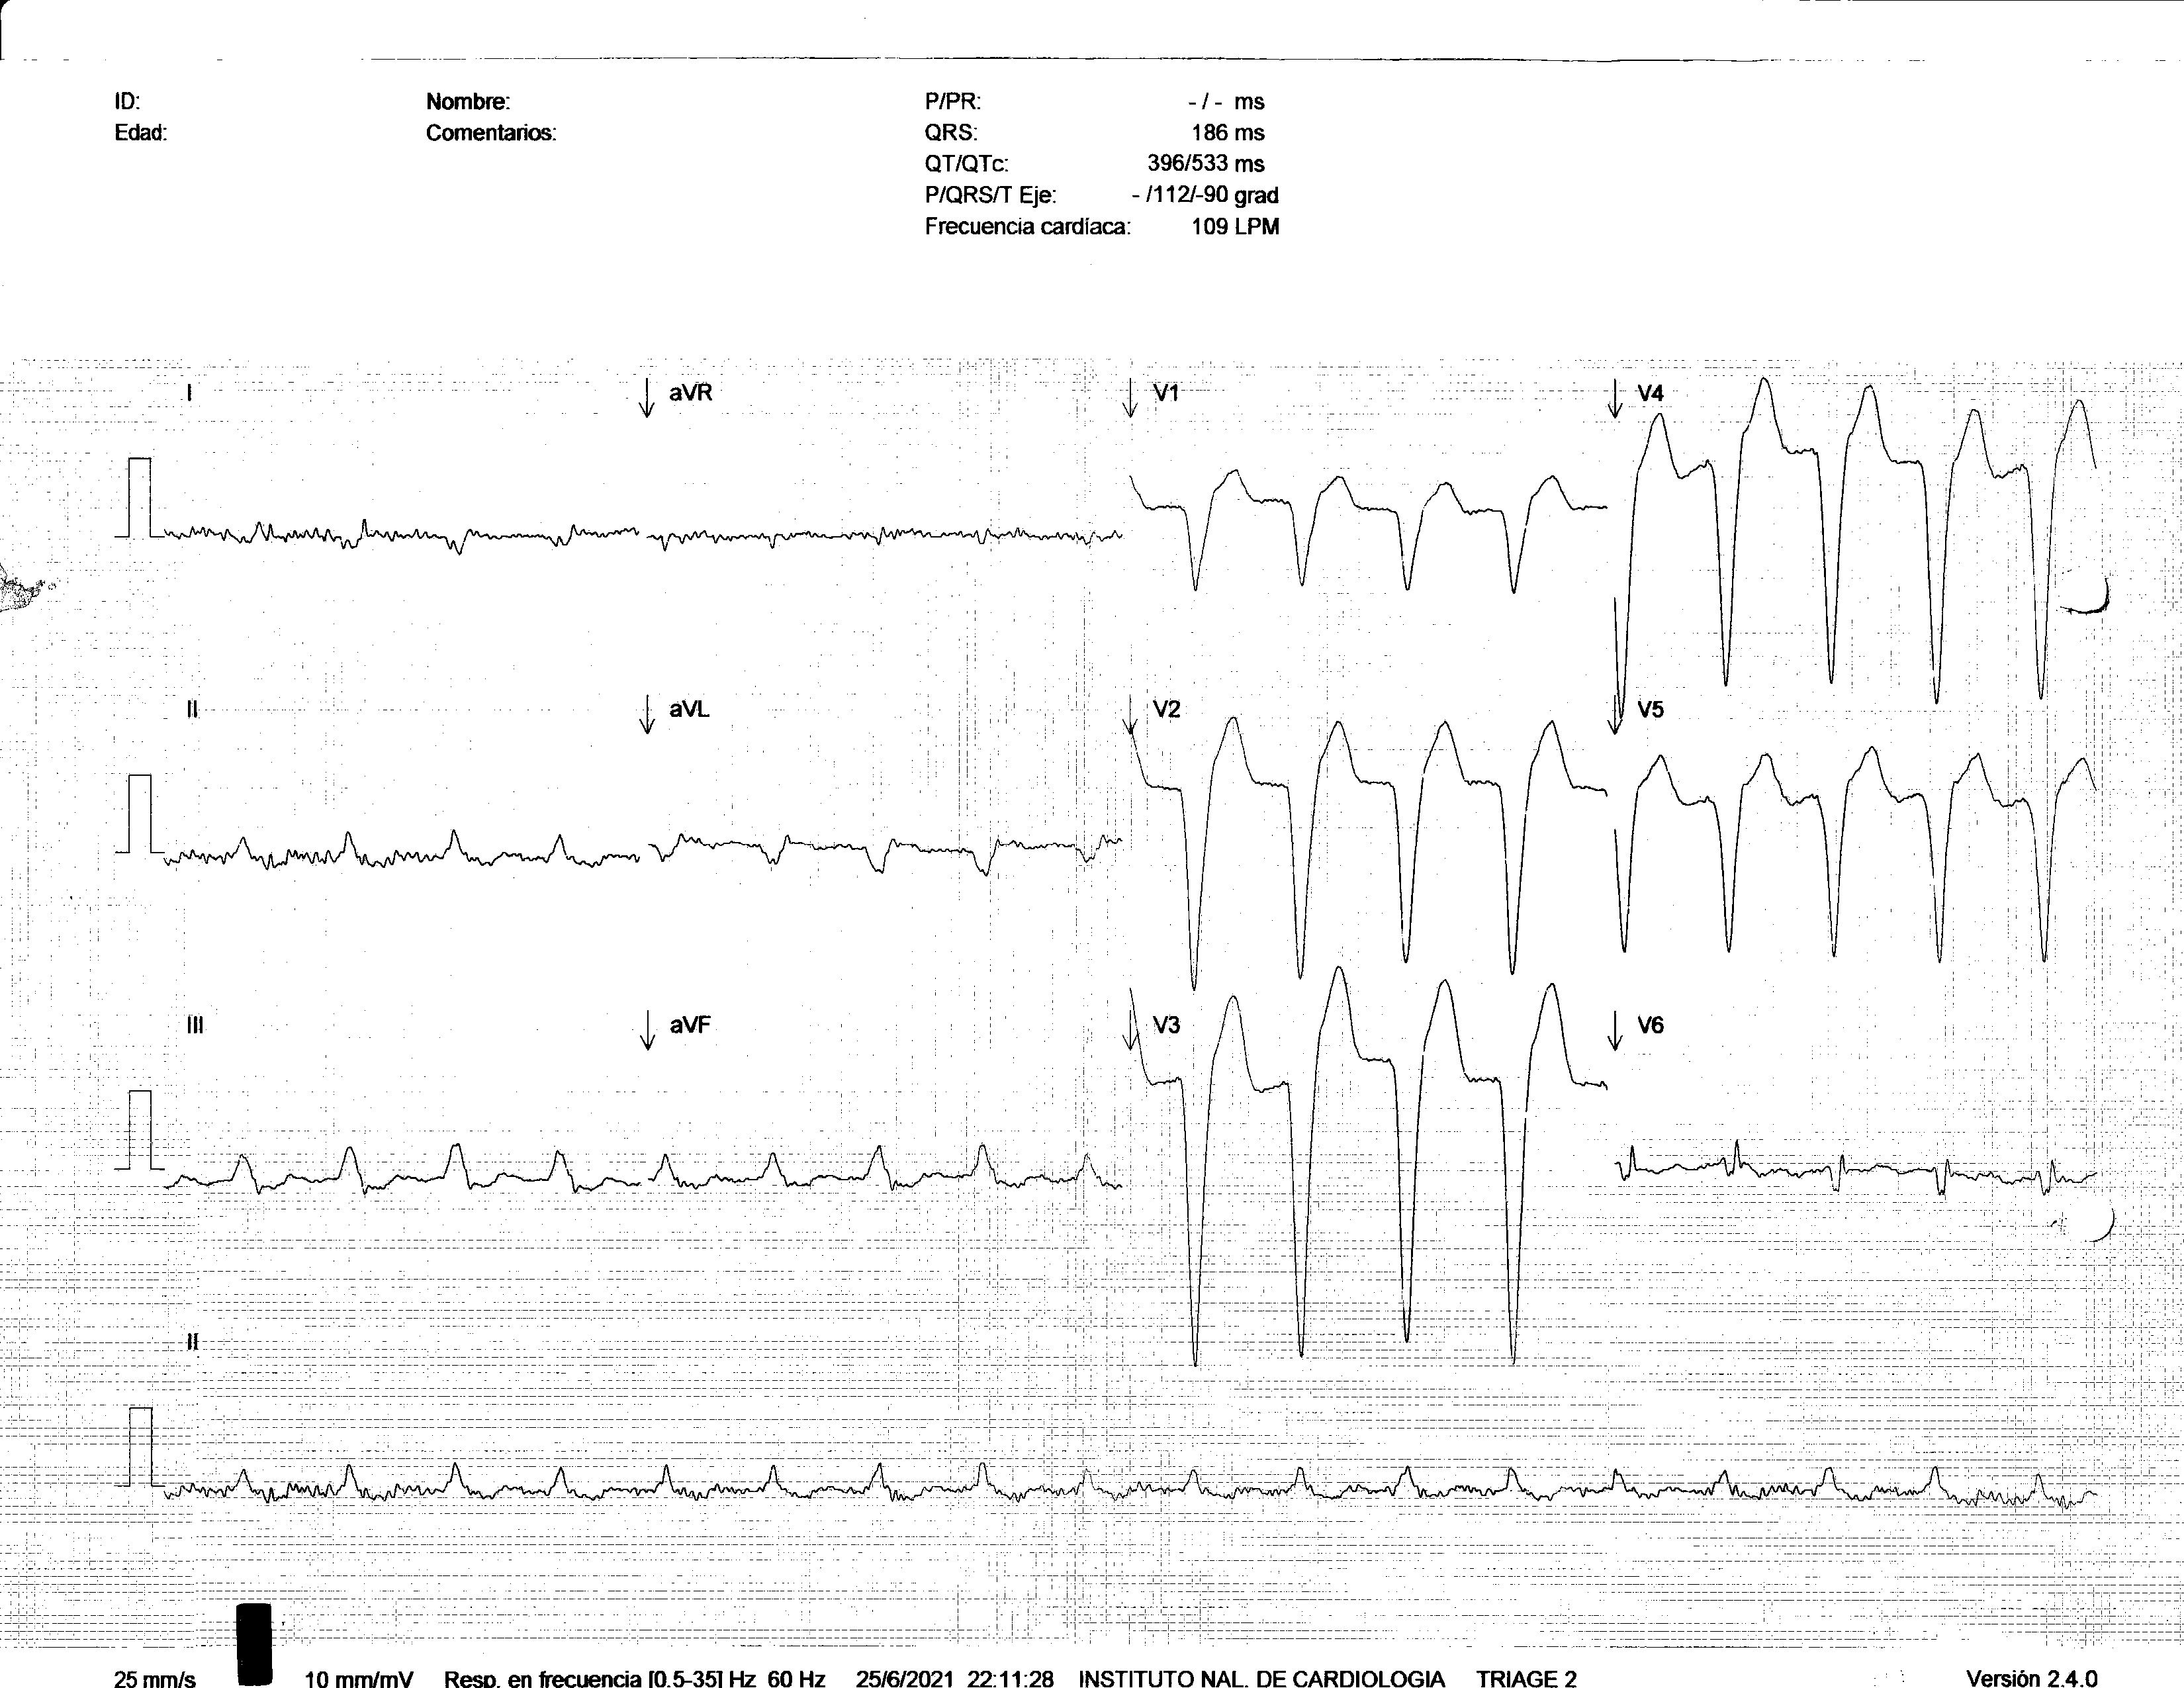

In [7]:
Image.fromarray(img)

In [8]:
kernel = np.ones((2, 2), np.uint8)

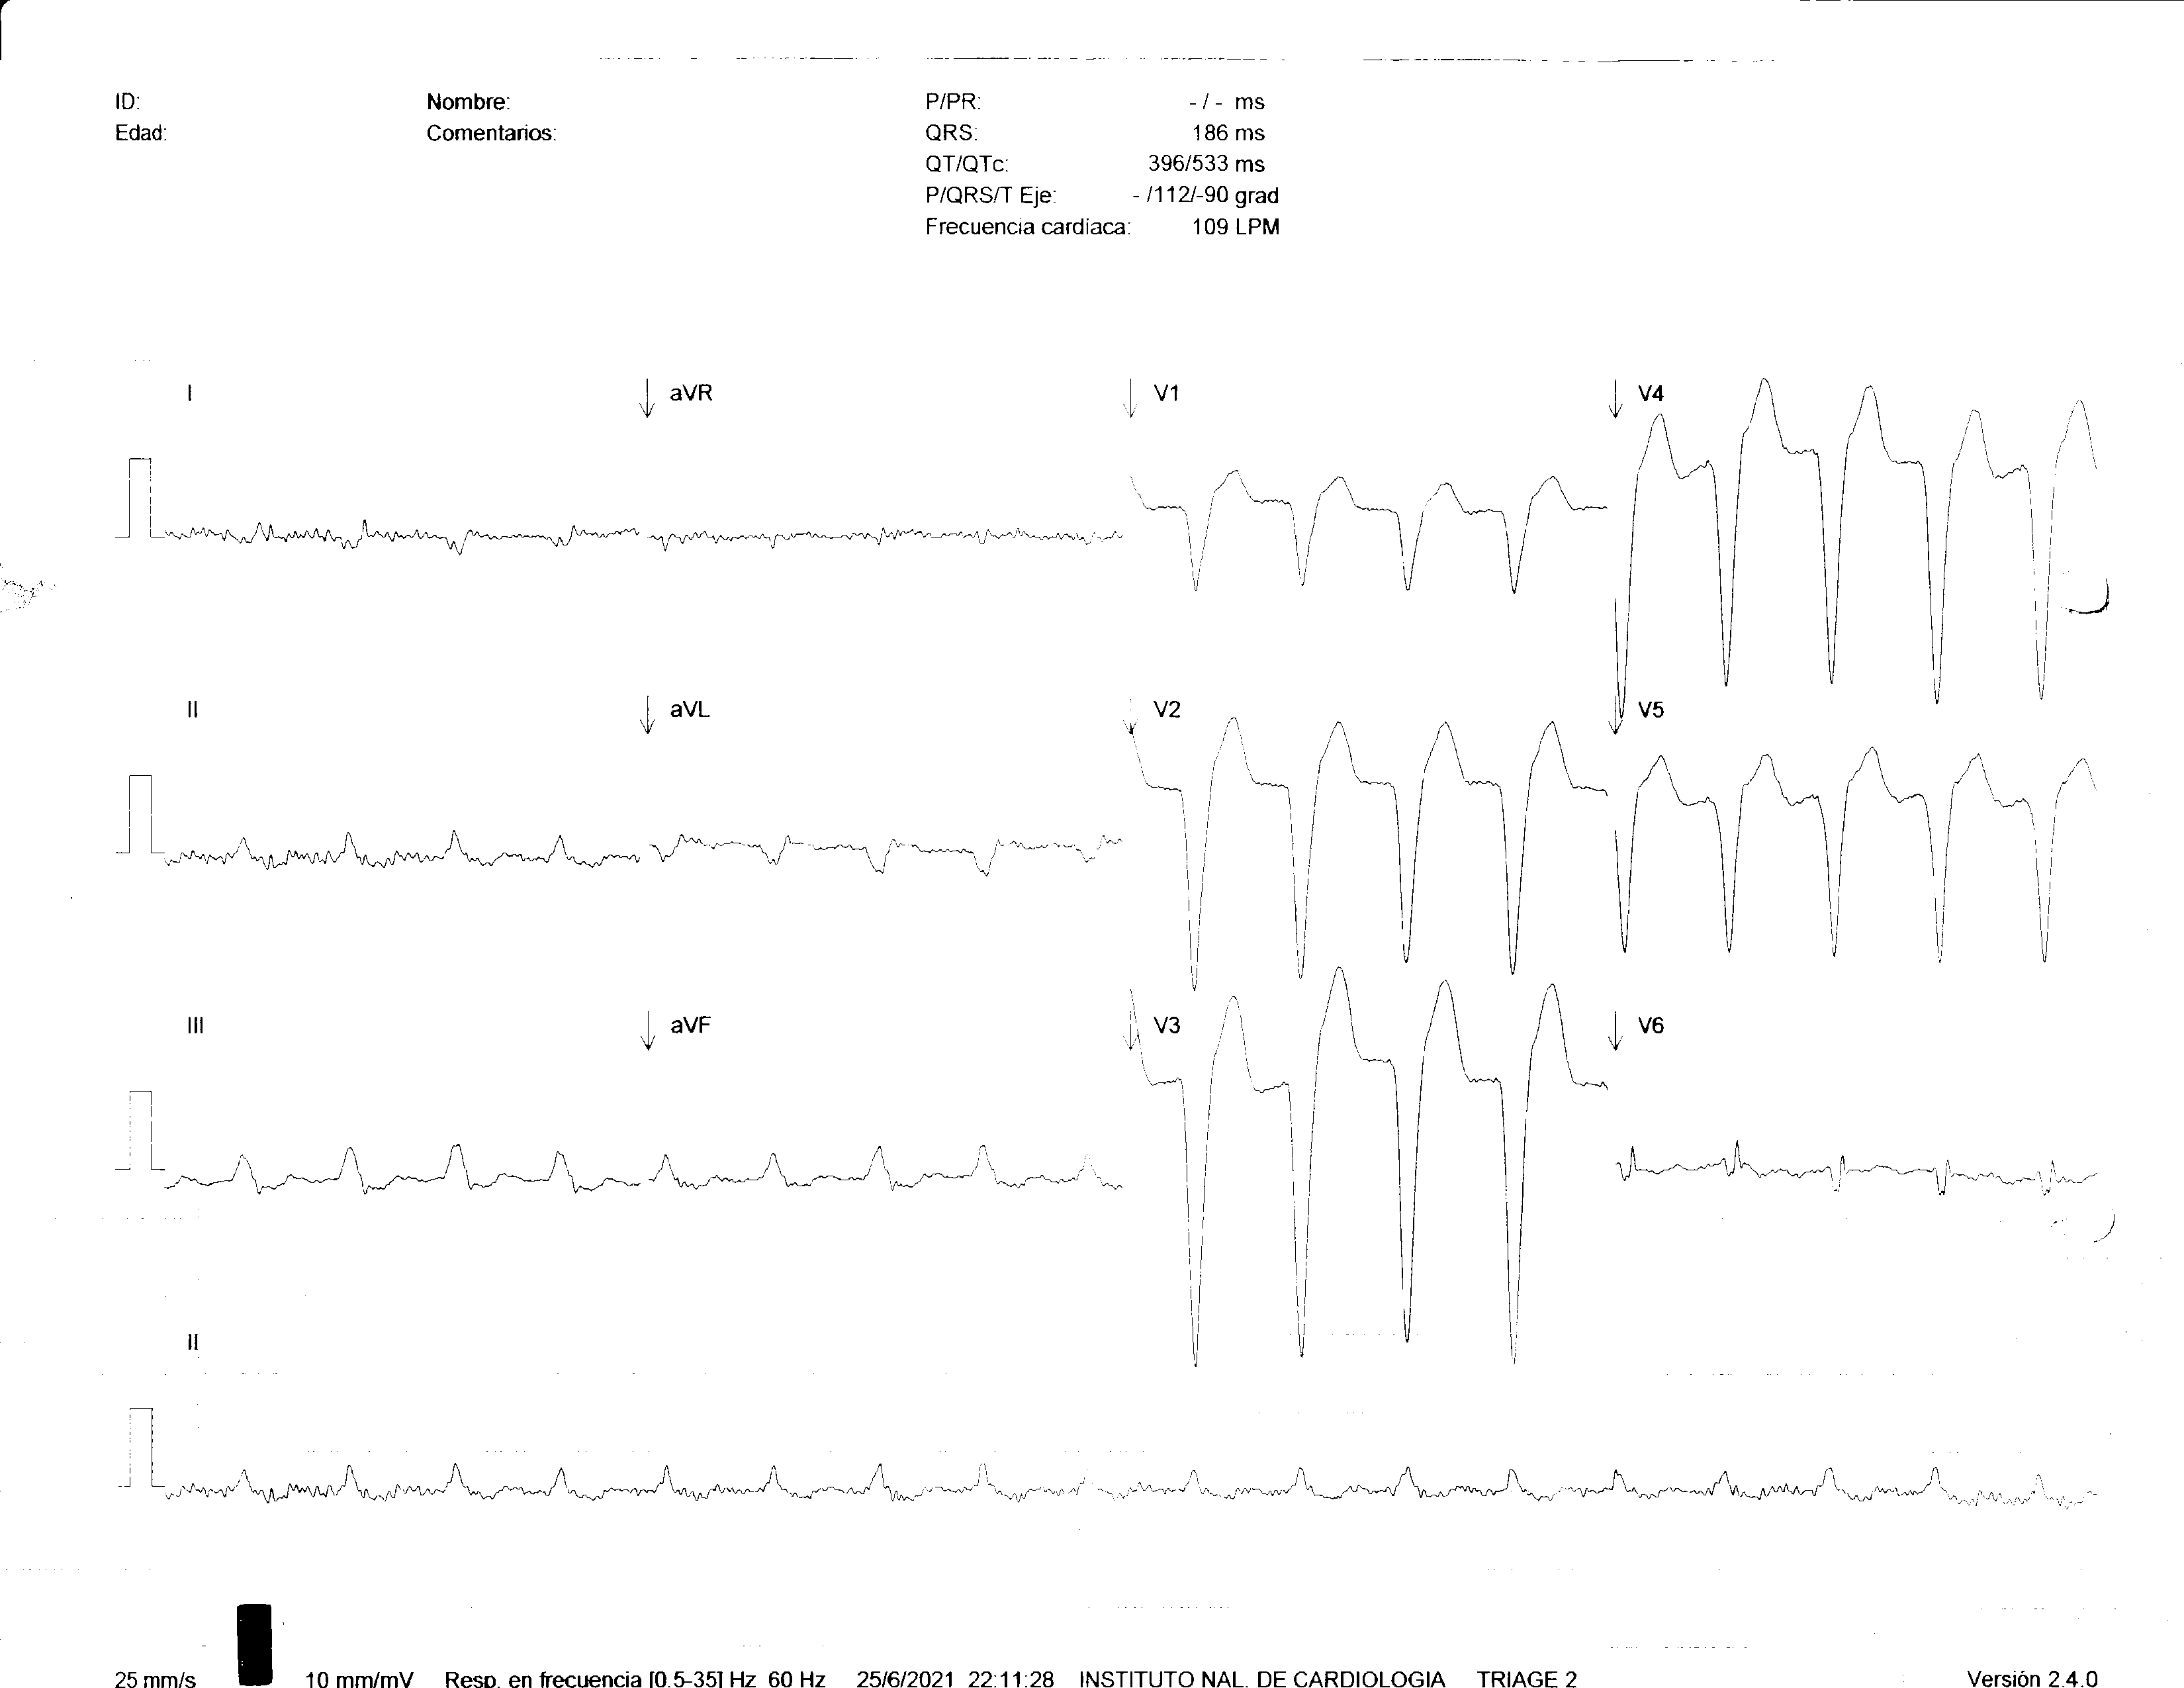

In [9]:
img_dilation = cv2.dilate(img, kernel, iterations=1)
Image.fromarray(img_dilation)

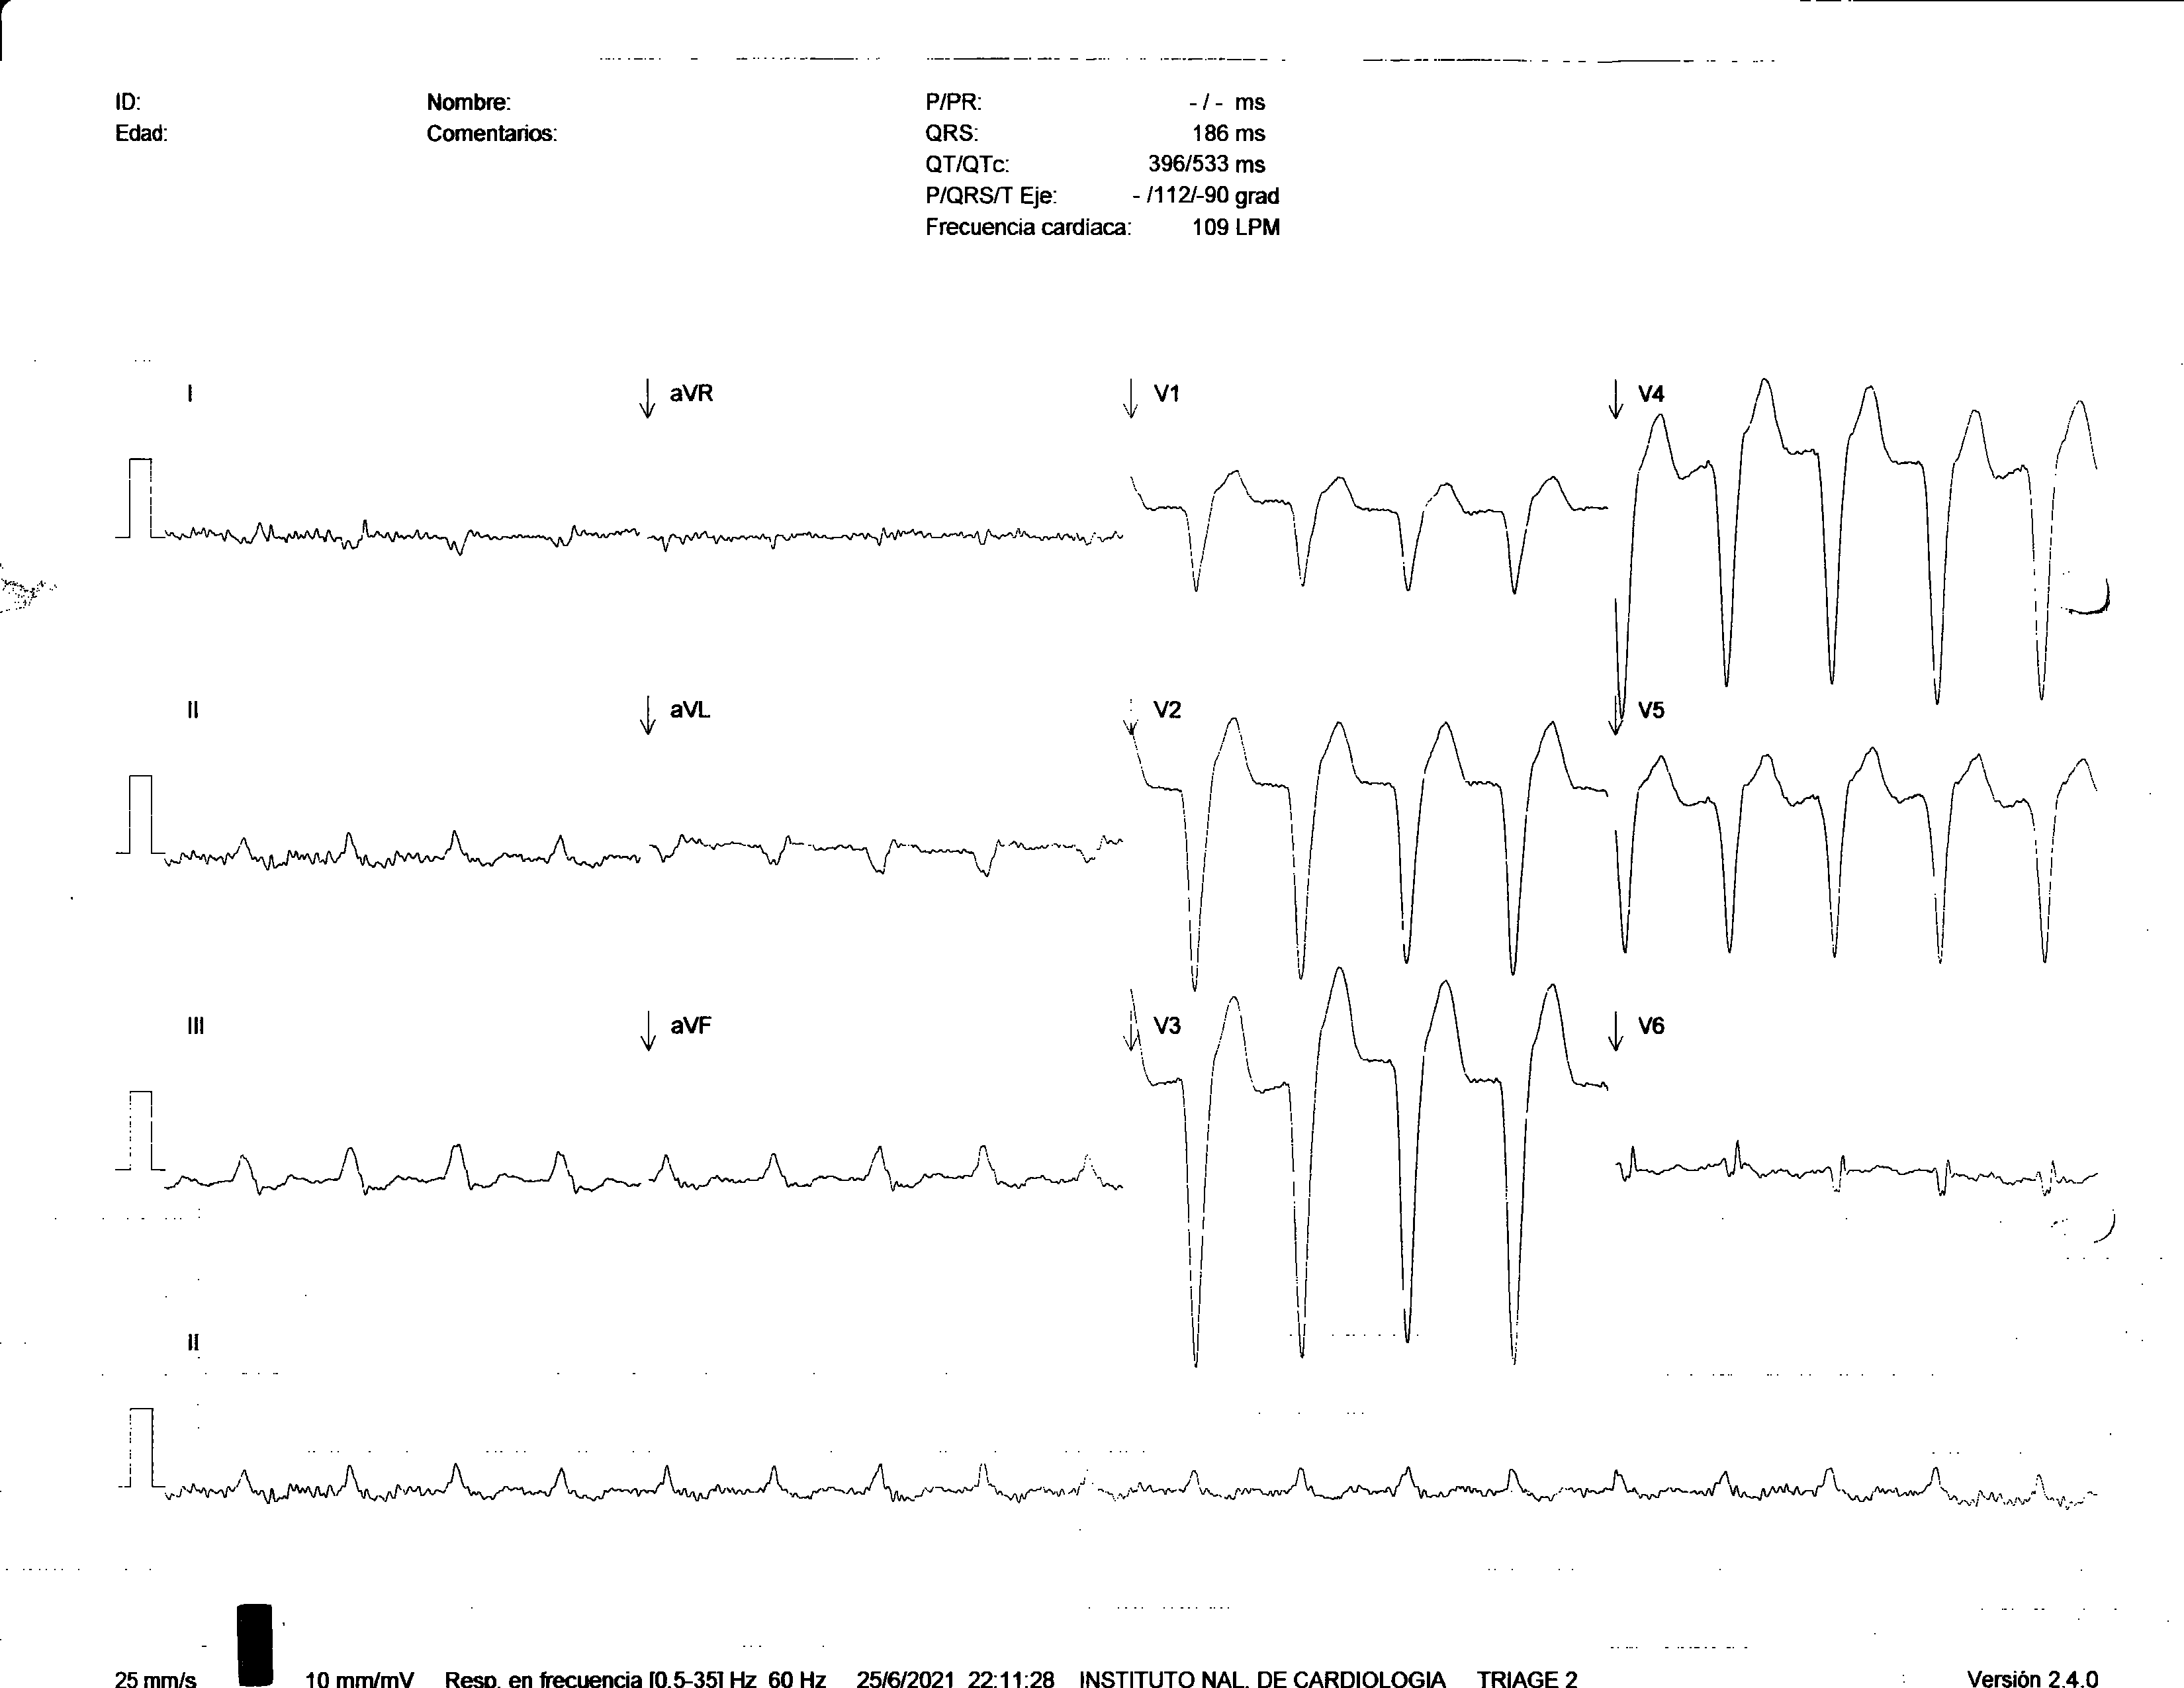

In [10]:
img_erosion = cv2.erode(img_dilation, kernel, iterations=1)
Image.fromarray(img_erosion)

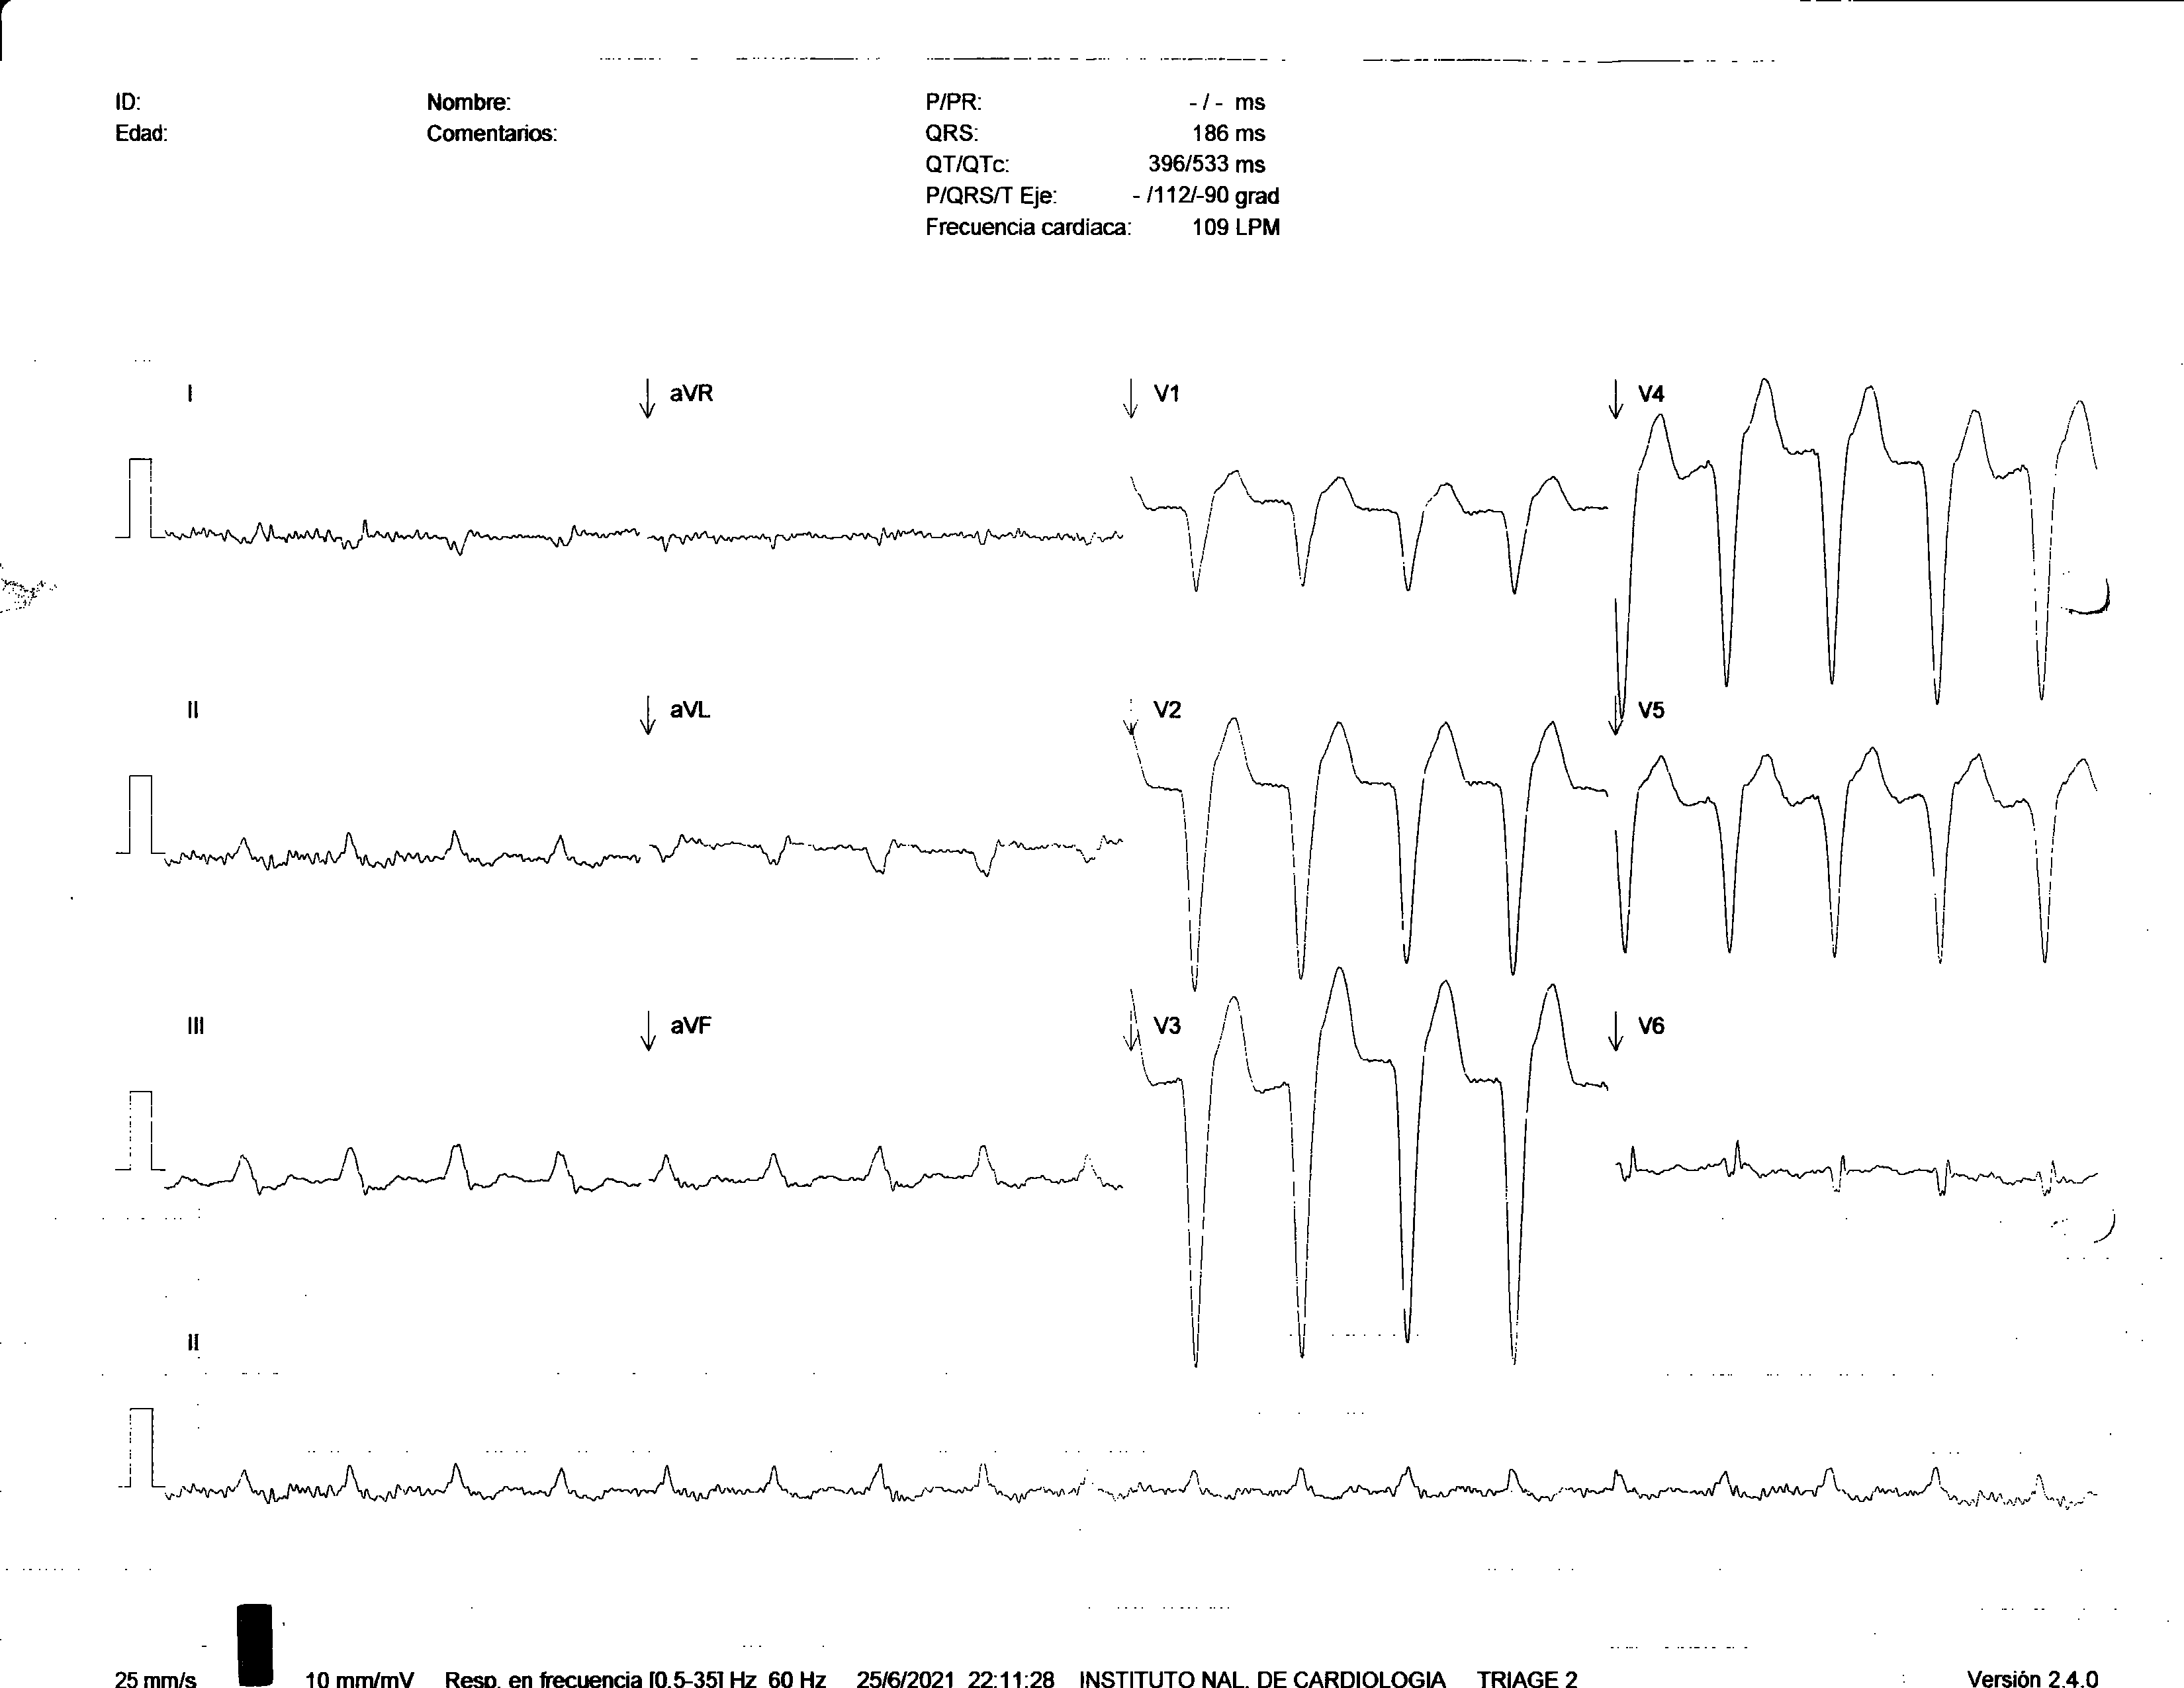

In [11]:
pil_img = Image.fromarray(img_erosion)
pil_img

In [111]:
# Simple image to string
print(pytesseract.image_to_string(pil_img))

# # Get bounding box estimates
# print(pytesseract.image_to_boxes(pil_img))

# # Get verbose data including boxes, confidences, line and page numbers
# print(pytesseract.image_to_data(pil_img))

Edad:

Nombre: P/PR: -/- ms
Comentarios: QRS: 186 ms
QT/QTc: 396/533 ms

P/QRS/T Eje: - /112/-90 grad

109 LPM

Frecuencia cardiaca:

——
= _..
a
_
SS
ae
{_ —

VF

1 cee
\ f | aera
: | |
.
|
|
|
y

|
<b Toad \ at lA / Vee al \

‘\
4

i Nnpattannl a canna! Na, petal a penn NengyAranall \ en owen ayo af a ied Me pore preety arena a pynerl a pnanl!\ Vin! ba pentane N odanet hog _

Version 240

5 mm/s i 40 mm/imV¥ Resp en frecuencia (0 5-351 Hz 60HZz 25/6/2021 22:11:28 INSTITUTO NAL DE CARDIOLOGIA TRIAGE ?



In [113]:
in_img = img_erosion.copy()
results = pytesseract.image_to_data(in_img, output_type=Output.DICT, lang='eng')  # ,config=custom_config)
boxresults = pytesseract.image_to_boxes(in_img, output_type=Output.DICT, lang='eng')  # ,config=custom_config)

for i in range(0, len(results["text"])):
    # extract the bounding box coordinates of the text region from the current result
    tmp_tl_x = results["left"][i]
    tmp_tl_y = results["top"][i]
    tmp_br_x = tmp_tl_x + results["width"][i]
    tmp_br_y = tmp_tl_y + results["height"][i]
    tmp_level = results["level"][i]
    conf = results["conf"][i]
    text = results["text"][i]

    if (tmp_level == 5):
        cv2.putText(in_img, text, (tmp_tl_x, tmp_tl_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
        cv2.rectangle(in_img, (tmp_tl_x, tmp_tl_y), (tmp_br_x, tmp_br_y), (0, 0, 255), 1)

for j in range(0, len(boxresults["left"])):
    left = boxresults["left"][j]
    bottom = boxresults["bottom"][j]
    right = boxresults["right"][j]
    top = boxresults["top"][j]
    cv2.rectangle(in_img, (left, top), (right, bottom), (255, 0, 0), 1)



In [11]:
cv2.imwrite('test.jpg',img_erosion)

True

In [12]:
from jupyter_bbox_widget import BBoxWidget
widget = BBoxWidget(
    image='test.jpg',
    classes=['1','aVR', 'V1', 'V4','V4','2','aVL','V2','V5','3','aVF','V3','V6','2'],
)
widget

BBoxWidget(classes=['1', 'aVR', 'V1', 'V4', 'V4', '2', 'aVL', 'V2', 'V5', '3', 'aVF', 'V3', 'V6', '2'], colors…

In [115]:
img_erosion.shape

(2550, 3300)

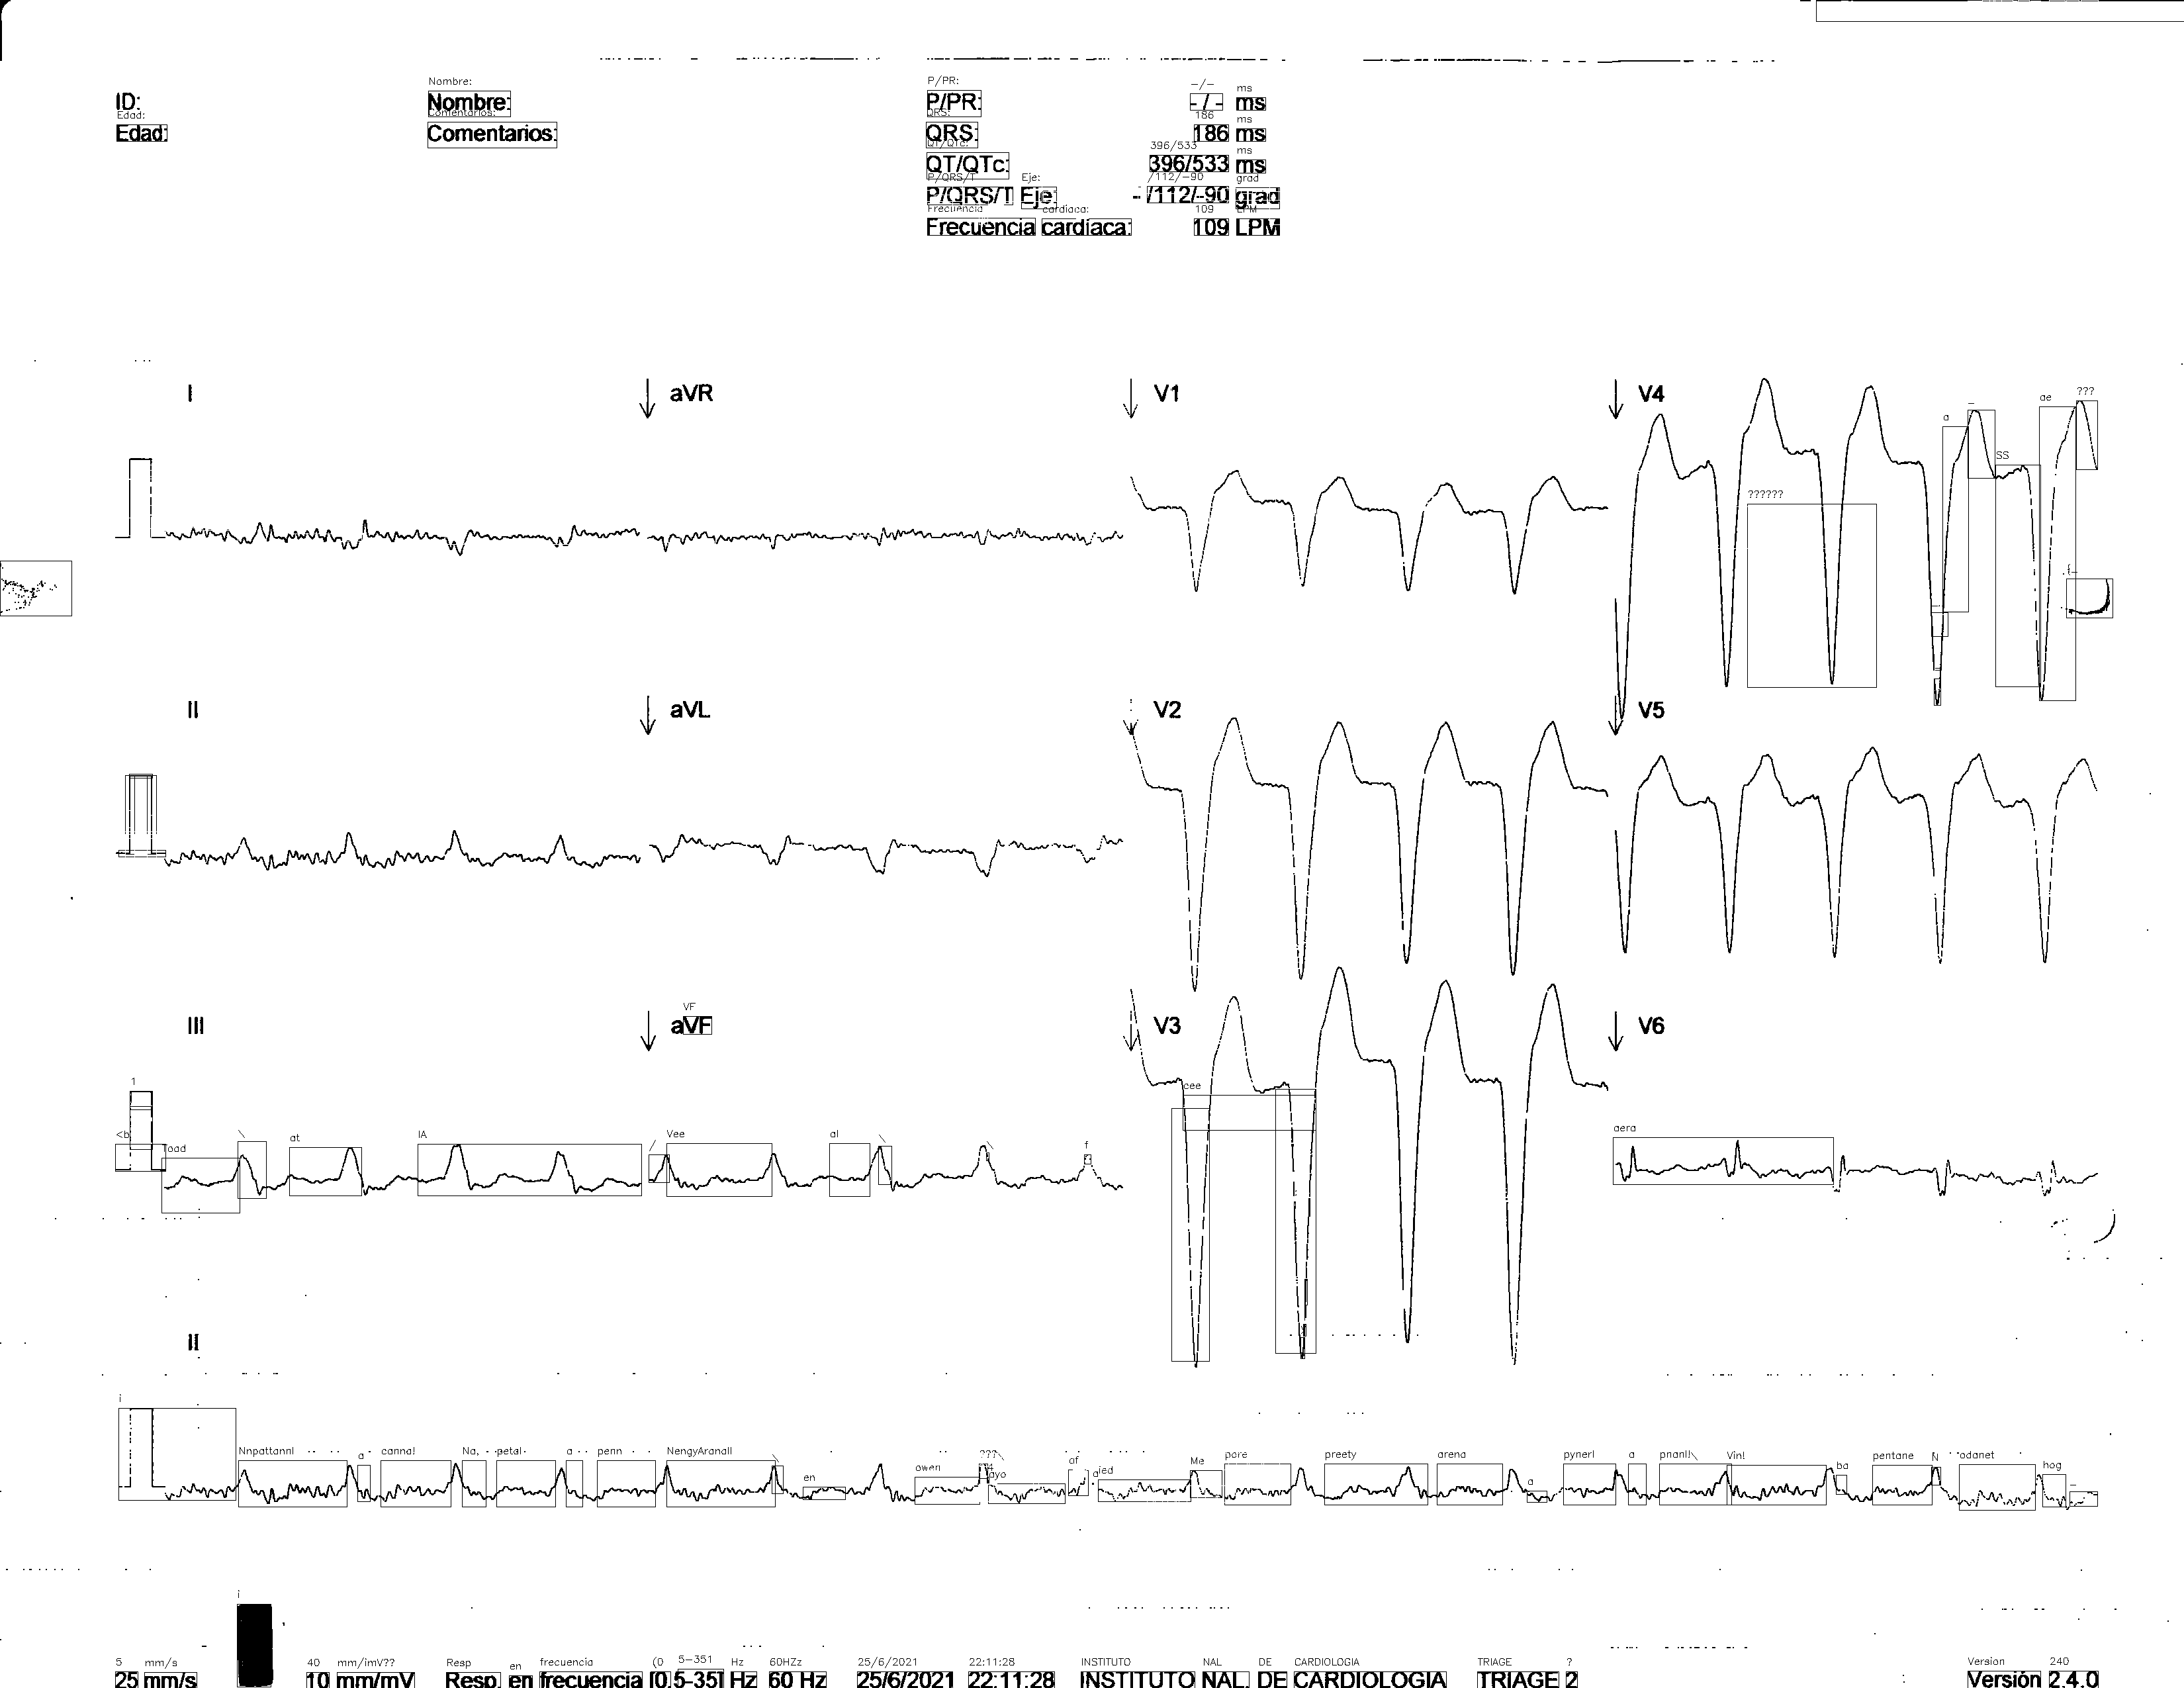

In [118]:
Image.fromarray(img_erosion)

In [12]:
from easyocr import Reader

In [17]:
image = img_erosion

In [14]:
reader = Reader(['en'])
results = reader.readtext(image)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
for (bbox, text, prob) in results:
    # display the OCR'd text and associated probability
    print("[INFO] {:.4f}: {}".format(prob, text))
    # unpack the bounding box
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))
    # cleanup the text and draw the box surrounding the text along
    # with the OCR'd text itself
#     text = cleanup_text(text)
    cv2.rectangle(image, tl, br, (0, 255, 0), 2)
    cv2.putText(image, text, (tl[0], tl[1] - 10),
    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
# show the output image

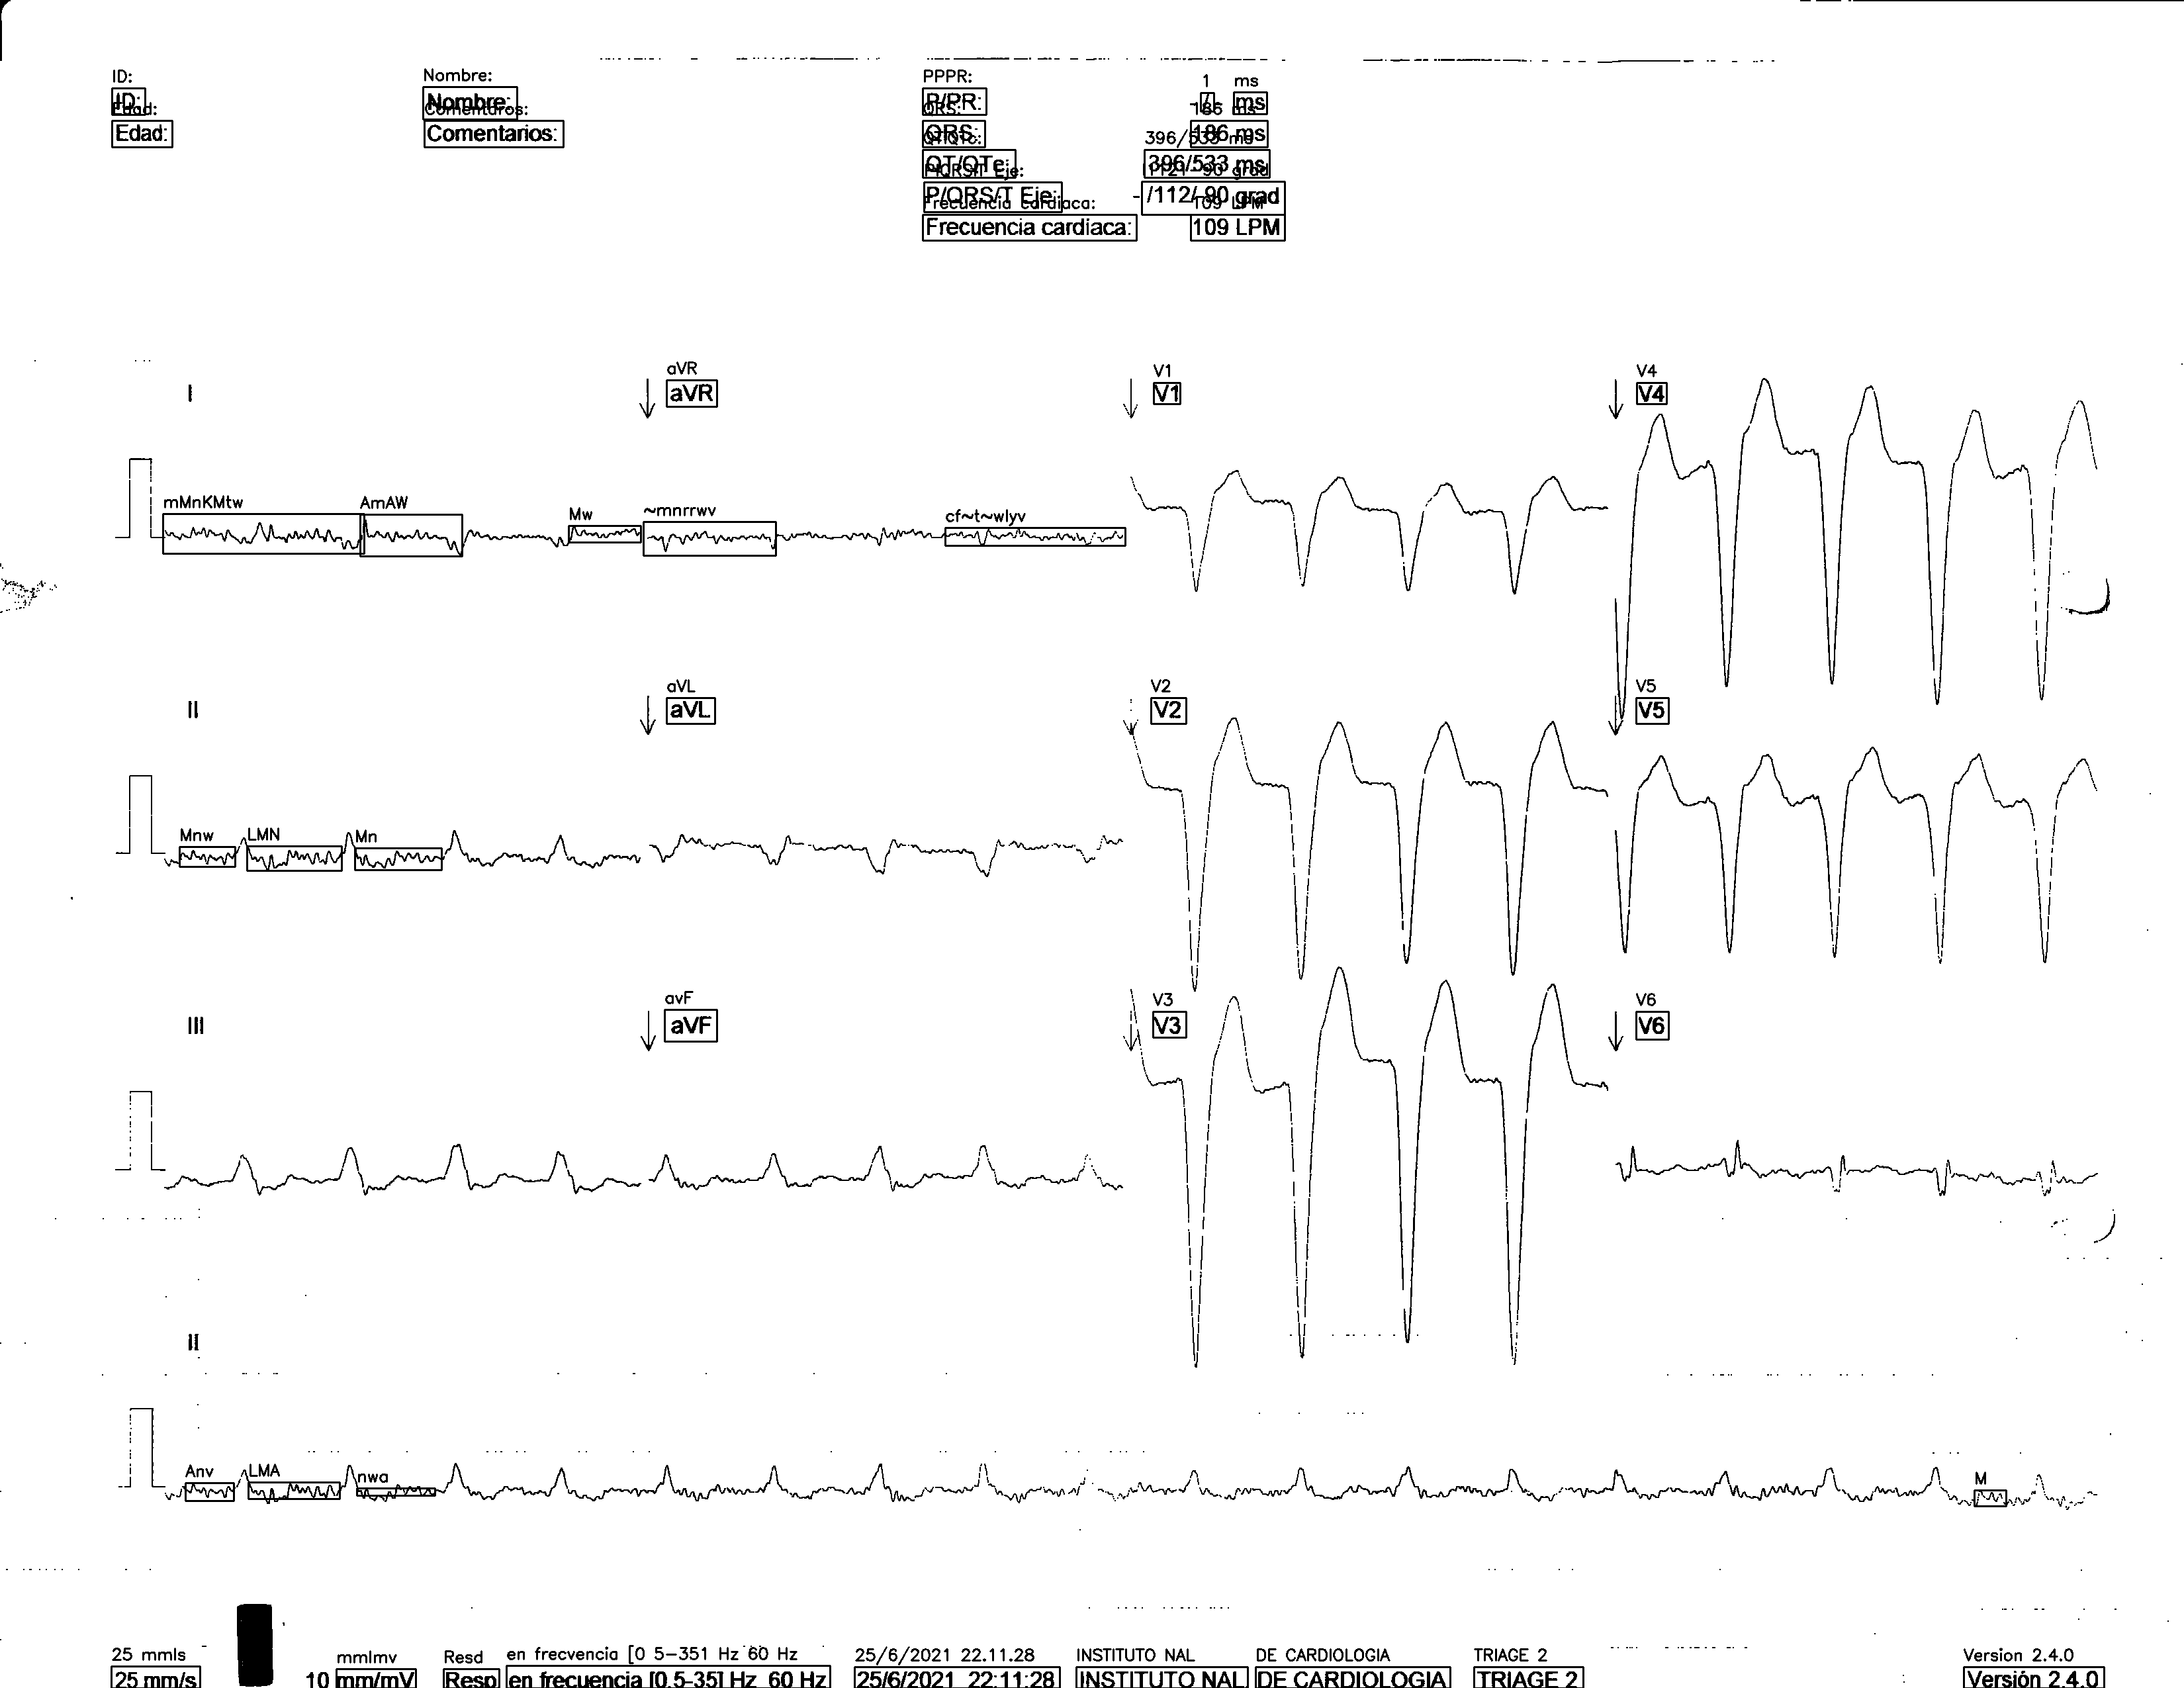

In [19]:
Image.fromarray(image)